## Regression trees:
Let’s consider a regression problem with continuous response Y and inputs X1 and X2:

Given a new input (x1,x2), how to find the corresponding prediction y using decision trees (we restrict attention to binary trees)?

=> We first split the space into two regions, and model the response as the mean of Y in each region, then one or both the regions are split into two more regions, and this process is continued until some stopping rule is applied.

The final model predicting Y with a constant $c_m$ for region $R_m$ where $(1<m<M)$ is:

$ \hat{f}(X) = \sum_{m=1}^{M} c_m \mathbb{I}\{(X_1, X_2) \in R_m\}.$

Question: The algorithm
 needs to automatically decide on the splitting variables and split points, how to choose those?

 We generally proceed with a greedy algorithm, starting with all of the data, we consider a splitting variable (feature) j and a split point s, and define the pair of hal-planes:

 $R_1(j, s) = \{X \mid X_j \leq s\} \quad \text{and} \quad R_2(j, s) = \{X \mid X_j > s\}.$

we solve for j,s:

$
\min_{j, s} \left[ \min_{c_1} \sum_{x_i \in R_1(j, s)} (y_i - c_1)^2 + \min_{c_2} \sum_{x_i \in R_2(j, s)} (y_i - c_2)^2 \right].
$
where in the inner minimization is solved using the average:

$
\hat{c}_1 = \text{ave}(y_i \mid x_i \in R_1(j, s)) \quad \text{and} \quad \hat{c}_2 = \text{ave}(y_i \mid x_i \in R_2(j, s)).
$

 For each splitting variable, the determination of the split point s can
 be done very quickly and hence by scanning through all of the inputs,
 determination of the best pair (j,s) is feasible.

 We then repeat the process until a stopping criterion is verified.

Stopping Criterion:
1. Grow a large tree $T_0$, stopping the splitting at some nodes number m (e.g m=5)
2. Find the subtree that minimizes the cost-complexity critrerion where |T| the number of terminal nodes:

$C_{\alpha}(T) = \sum_{m=1}^{|T|} N_m Q_m(T) + \alpha |T|$

$\alpha > 0$ is a tuning parameter that is estimated using a k-fold cross validation.


## Classification trees:
For classification problems, the only difference with regression trees is the criteria for splitting nodes and pruning the tree.
In a node m , representing the region Rm with Nm observations, let:

$
\hat{p}_{mk} = \frac{1}{N_m} \sum_{x_i \in R_m} I(y_i = k),
$

Different measures of impurity include:
$
\text{Misclassification error:} \quad \frac{1}{N_m} \sum_{i \in R_m} I(y_i \neq k(m)) = 1 - \hat{p}_{mk(m)}.
$

$
\text{Gini index:} \quad \sum_{k \neq k'} \hat{p}_{mk} \hat{p}_{mk'} = \sum_{k=1}^K \hat{p}_{mk}(1 - \hat{p}_{mk}).
$

$
\text{Cross-entropy or deviance:} \quad -\sum_{k=1}^K \hat{p}_{mk} \log \hat{p}_{mk}.
$


Accuracy: 1.00


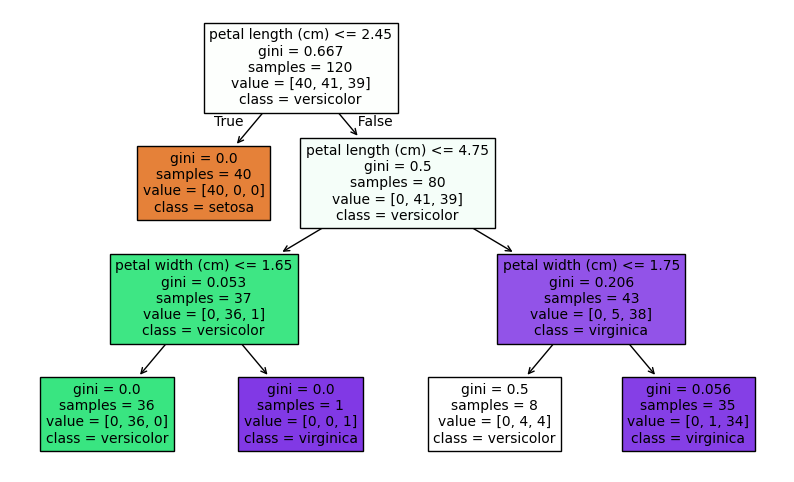

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Visualize the tree (requires matplotlib and graphviz)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()
